# Coursework #2 AI for Sustainable Development

I am happy for this coursework to be openly available for anyone to use.

## Coursework overview
Coursework #2 is a data analysis coding-based coursework. You are asked to choose a dataset related to sustainable development and do some machine learning based analysis. We will detail this more in the next sections.

You can choose an application/dataset from the ones we analysed in the first coursework or choose a completely new dataset: 
* **Option 1**: Choose a dataset from the SustainBench paper (which includes 15 datasets related to sustainable development), please do not choose the climate action one related to brick kilns, as we will use it in class.
You can choose the same dataset that you use in coursework #1. Please note that the authors from SustainBench have a GitHub project with data loaders, preprocessing code and baselines for these datasets here: https://github.com/sustainlab-group/sustainbench
* **Option 2**: Choose an alternative dataset of your choice (e.g. that you are interested in). Please if you choose this option motivate the dataset's relationship to sustainable development. If the dataset is part of an online competition (e.g. in Kaggle, Zindi, etc), please make sure to include information that makes us discern what you have built, vs what was built from someone else (since in some cases participants of the competition submit tutorials, etc). 

Please do NOT choose the same dataset that you used as part of a different coursework for a different module (which may be possible as the coursework is up to some extent open ended), as this would be considered self-plagiarism. 

Once you have chosen your dataset we will ask you to do the following: 
1. Do some **exploratory data analysis** to get some insights about the dataset. We do not give specific guidelines here as this may depend on the dataset itself, but we ask you to justify your choices and the results of your analysis.
2. Think about the **task that the dataset is most suitable for** and discuss what would be the most **appropriate evaluation criteria** for such a machine learning task. For example, you may have a dataset where songs are labelled with different music genres. Perhaps the task for which the dataset is most suitable for is to build a multi label prediction model that can classify new songs, and the most appropriate evaluation metric could be the hamming loss (commonly used in multi label prediction, which could be used both as inspiration for a training objective for neural networks, or simply as the evaluation criteria for model selection and hyperparameter tuning). 
3. **Design and implement a machine learning system/pipeline**. This could be either supervised or unsupervised. In either case, the pipeline you choose needs to be aligned with the task you defined before. 
4. **Design a set of experiments** and discuss how these fit with the questions that the dataset aims to address. Do a **performance & scalability analysis** of your model.
5. Analyse and discuss some of the **ethical implications**, in connection with your exploratory data analysis and model performance (e.g. do you appreciate any imbalances in the data or initial biases that can be problematic?).
6. Discuss **sustainable development relevance & impact**.

We ask your code to be in python, but beyond that we do not mind what packages you use. 

For grading, we will not check your code in depth (beyond perhaps checking that it's doing what you describe). Instead, our focus will be on grading the analysis you have done, how well it's motivated and justified, how insightful it was, how do you interpret the results in terms of impact and sustainable development, etc.

**Submission**: You do not have to submit your dataset and notebook to the coursework submission. Simply run the analysis in jupyter notebooks and then export the notebook as html or pdf. You can then submit this html/pdf file in moodle. 

### Previous work (5%)

**Guidelines**: We first ask you to summarise what has been done before with this dataset. While this is not specifically necessary for the purpose of the coursework, it is important for us to mark the novelty of your analysis, specially since many of these datasets come with associated baselines in the GitHub link we shared before. While we encourage you to compare to what has been done before we will evaluate whether you explored new approaches. Please give us in this section a brief introduction to the dataset and to the previous models that were built before using the data (you do not need to go over all models that were proposed before, you can just focus on the one with the best performance). Tell us whether these models were publicly available, and if so where to find them. It is crucial that in the next sections you justify how your analysis differs from this previous work.


 

In this project we use data from the US drought monitor website which was downloaded from kaggle [1]. The data set was manually created and contains many geographical features that can be used to predict drought. Ultimately, the goal is to generalize these predictions of drought in the US to other regions of the world. A list of the features and their meaning is presented below.

|Indicator | Description                        |
|--------|------------------------------------- |
|Date| The year/month/day corresponding to when the features were collected| 
|WS10M_MIN| Minimum Wind Speed at 10 Meters (m/s)|
|QV2M|	Specific Humidity at 2 Meters (g/kg)|
|T2M_RANGE|	Temperature Range at 2 Meters (C)|
|WS10M|	Wind Speed at 10 Meters (m/s)|
|T2M|	Temperature at 2 Meters (C)|
|WS50M_MIN|	Minimum Wind Speed at 50 Meters (m/s)|
|T2M_MAX|	Maximum Temperature at 2 Meters (C)|
|WS50M|	Wind Speed at 50 Meters (m/s)|
|TS|	Earth Skin Temperature (C)|
|WS50M_RANGE|	Wind Speed Range at 50 Meters (m/s)|
|WS50M_MAX|	Maximum Wind Speed at 50 Meters (m/s)|
|WS10M_MAX|	Maximum Wind Speed at 10 Meters (m/s)|
|WS10M_RANGE|	Wind Speed Range at 10 Meters (m/s)|
|PS|	Surface Pressure (kPa)|
|T2MDEW|	Dew/Frost Point at 2 Meters (C)|
|T2M_MIN|	Minimum Temperature at 2 Meters (C)|
|T2MWET|	Wet Bulb Temperature at 2 Meters (C)|
|PRECTOT|	Precipitation (mm day-1)|



Each row of data also has an associated drought score. These range from 0-5 where 0 is no drought and 1-5 are increasing levels of drought severity. This makes the problem a multicast classification.

For this dataset a baseline accuracy score of 0.809 was achieved using a random forest model on kaggle [2]. There has been much research to show the benefits of stacking models, therefore I will use this model to improve on the previous work [3]. In my project I tested multiple different types of algorithms and compared there performance. I then created a stacked model by combining the best models and compared this to the baseline. It is important to note that the baseline used the full dataset, however I only used 1,500,000 rows of the dataset.


#### Importance of drought prediction

Drought can cause many problems that range from unusable land for crops all the way to rising food prices, causing increases in malnutrition. The negative impacts of drought span all of society, therefore prevention is important. Drought can be caused by a multitude of interacting geological and human factors which makes it difficult to predict [4]. This project aims to create a model to predict drought, such that it can be used to advise organizations on which areas are most likely to be at risk. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import NeighbourhoodCleaningRule
#from imblearn.under_sampling import NearMiss
#from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#from sklearn.decomposition import PCA, KernelPCA
from sklearn.tree import DecisionTreeClassifier
#from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import cohen_kappa_score
#from sklearn import metrics
#from sklearn.model_selection import GridSearchCV
#from sklearn.naive_bayes import GaussianNB
#from sklearn.metrics import roc_curve, auc
#from sklearn.metrics import roc_auc_score
#from xgboost import XGBClassifier
#from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
#from sklearn import svm
import pickle
import missingno as msno
#from sklearn.neural_network import MLPClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from skopt import BayesSearchCV
#from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.experimental import enable_halving_search_cv
#from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import StackingClassifier

### Exploratory data analysis (15%)

**Guidelines**: Load the dataset and answer the following questions: 
* What are the characteristics of your dataset? Do you see any trends in the data? (5%)
* Are there any challenges with the data? (missing values, outliers, imbalanced classes, biases, etc...) (5%)
* Does the data need any pre-processing to successfully apply standard machine learning models? If so, what kind? Please do the pre-processing that you consider necessary. (5%)

We will tackle all these questions together as they are interrelated.


# Are there any challenges with the data? (missing values, outliers, imbalanced classes, biases, etc...) (5%)

1] We have values given by NaN    
2] Imbalanced classes  
3] The score feature contains floats but they should be integers  
4] The date feature isn't very useful as it is and needs to be pre-processed

# Does the data need any pre-processing to successfully apply standard machine learning models? If so, what kind? Please do the pre-processing that you consider necessary. (5%)

1] The NaN values need to be removed  
2] Minority classes need to be oversampled using SMOTE   
3] Score feature needs to be converted to an int    
4] We need to split the date given in the form year-month-day such that the trends with respect to these individual time periods can be found  


In the beggining of this section we will show some basic characteristics and trends of the dataset.  

In [2]:
#df = pd.read_csv('train_timeseries.csv', nrows=1500000)
df = pd.read_csv('train_timeseries.csv', nrows=15000)

First we simply visualise the top 5 rows of data to understand what the data looks like.

In [3]:
df.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,...,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


Next we look at the description of the dataset produced by pandas.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fips         15000 non-null  int64  
 1   date         15000 non-null  object 
 2   PRECTOT      15000 non-null  float64
 3   PS           15000 non-null  float64
 4   QV2M         15000 non-null  float64
 5   T2M          15000 non-null  float64
 6   T2MDEW       15000 non-null  float64
 7   T2MWET       15000 non-null  float64
 8   T2M_MAX      15000 non-null  float64
 9   T2M_MIN      15000 non-null  float64
 10  T2M_RANGE    15000 non-null  float64
 11  TS           15000 non-null  float64
 12  WS10M        15000 non-null  float64
 13  WS10M_MAX    15000 non-null  float64
 14  WS10M_MIN    15000 non-null  float64
 15  WS10M_RANGE  15000 non-null  float64
 16  WS50M        15000 non-null  float64
 17  WS50M_MAX    15000 non-null  float64
 18  WS50M_MIN    15000 non-null  float64
 19  WS50

We can see that the feature, score has many null values and its variable type is float64. The null values need to be removed and the float64 values need to be converted to int as the score data is discrete.

In [5]:
df.isnull().sum()

fips               0
date               0
PRECTOT            0
PS                 0
QV2M               0
T2M                0
T2MDEW             0
T2MWET             0
T2M_MAX            0
T2M_MIN            0
T2M_RANGE          0
TS                 0
WS10M              0
WS10M_MAX          0
WS10M_MIN          0
WS10M_RANGE        0
WS50M              0
WS50M_MAX          0
WS50M_MIN          0
WS50M_RANGE        0
score          12857
dtype: int64

The score has exactly 1286 null counts and these need to be removed so the analysis can be carried out later. We will check if the non scores have been correctly removed.

In [6]:
df = df.dropna()
df.isnull().sum()

fips           0
date           0
PRECTOT        0
PS             0
QV2M           0
T2M            0
T2MDEW         0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
score          0
dtype: int64

We can see now that the feature score has no null values as they have been removed.

Now we convert the score to an int variable type.

In [7]:
df['score'] = df['score'].round().astype(int)
df.dtypes

fips             int64
date            object
PRECTOT        float64
PS             float64
QV2M           float64
T2M            float64
T2MDEW         float64
T2MWET         float64
T2M_MAX        float64
T2M_MIN        float64
T2M_RANGE      float64
TS             float64
WS10M          float64
WS10M_MAX      float64
WS10M_MIN      float64
WS10M_RANGE    float64
WS50M          float64
WS50M_MAX      float64
WS50M_MIN      float64
WS50M_RANGE    float64
score            int32
dtype: object

Now the score has been successfully converted to int32.

Another problem is the class imbalance of the score feature.

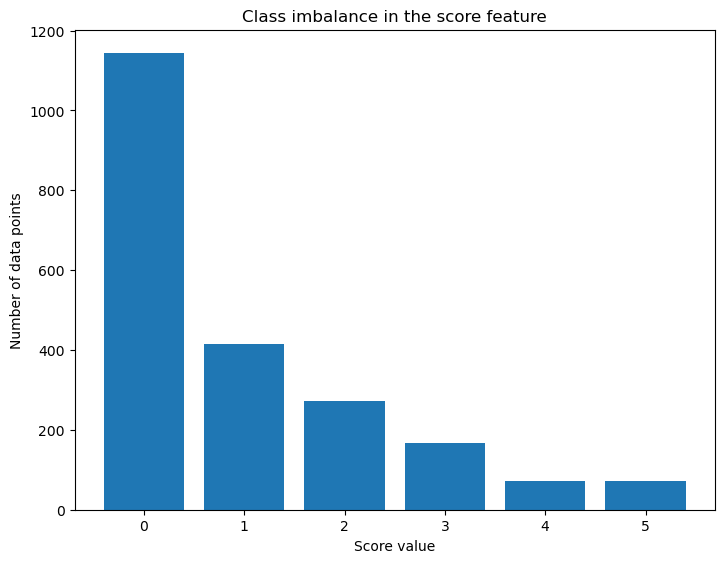

Number of data points for each score value:
--------------------------------------------
0    1145
1     414
2     273
3     168
4      72
5      71
Name: score, dtype: int64


In [8]:
score_counts = df['score'].round().value_counts()
#df['score'].value_counts().plot(kind = 'bar')
score_counts_array = []
for i in range(len(score_counts)):
    score_counts_array.append(score_counts[i])
score_value = np.array([0,1,2,3,4,5])
score_counts[5]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(score_value, score_counts_array)
plt.title('Class imbalance in the score feature')
plt.xlabel('Score value')
plt.ylabel('Number of data points')
plt.show()

print('Number of data points for each score value:')
print('--------------------------------------------')
print(score_counts)

Clearly, we can see from the plot and the data printed above that the class given by 0 (no drought) has far more samples than the rest, which makes sense physically as drought is a comparatively rare occurance. We therefore need to look into this class imbalance later. We have a choice of upsampling or downsampling our classes, however in this case the minority class is very small, so we want to upsample to keep as much information from the data.

Finally we need to seperate the year-month-day data, such that trends with respect to these variables can be analysed easier. 

In [9]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day

We now show the head of the data again and its new size.

In [10]:
print(df.head())

    fips        date  PRECTOT      PS  QV2M    T2M  T2MDEW  T2MWET  T2M_MAX  \
3   1001  2000-01-04    15.95  100.29  6.42  11.40    6.09    6.10    18.09   
10  1001  2000-01-11     1.33  100.40  6.63  11.48    7.84    7.84    18.88   
17  1001  2000-01-18     1.11  100.39  9.53  14.28   13.26   13.26    18.04   
24  1001  2000-01-25     0.00  100.11  2.05  -0.78   -7.93   -7.72     5.65   
31  1001  2000-02-01     0.00  101.00  3.36   2.06   -1.73   -1.70    11.02   

    T2M_MIN  ...  WS10M_MIN  WS10M_RANGE  WS50M  WS50M_MAX  WS50M_MIN  \
3      2.16  ...       2.08         3.59   6.73       9.31       3.74   
10     5.72  ...       1.05         1.43   3.55       6.38       1.71   
17     8.98  ...       1.67         1.92   5.19       6.40       3.84   
24    -5.46  ...       2.28         2.32   5.75       8.03       3.96   
31    -4.21  ...       0.88         1.86   4.18       6.38       1.27   

    WS50M_RANGE  score  year  month  day  
3          5.58      1  2000      1    4  


We now see the extra year, month and day columns as expected.

We will now look at some common statistics for our data's features.

In [11]:
df.describe()

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,...,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,year,month,day
count,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000,...,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000
mean,1002.516566,3.880117,100.751073,11.050597,18.606094,13.914592,13.923738,24.395912,13.414452,10.981554,...,1.417284,1.867853,4.251139,5.941363,2.470901,3.470518,0.983201,2007.145124,6.509099,15.694820
std,1.453153,8.084649,0.703374,4.793233,7.993162,7.912303,7.893866,7.933531,8.415615,3.432696,...,0.804288,0.867197,1.454020,1.651471,1.536395,1.311721,1.344733,4.907352,3.452193,8.798566
min,1001.000000,0.000000,98.430000,1.040000,-6.350000,-15.450000,-14.520000,-2.120000,-10.130000,2.170000,...,0.020000,0.460000,1.070000,1.680000,0.030000,0.810000,0.000000,2000.000000,1.000000,1.000000
25%,1001.000000,0.000000,100.230000,7.015000,12.800000,8.485000,8.485000,18.685000,7.120000,8.600000,...,0.820000,1.280000,3.180000,4.880000,1.245000,2.490000,0.000000,2003.000000,4.000000,8.000000
50%,1003.000000,0.300000,100.730000,11.150000,19.640000,15.690000,15.690000,25.290000,14.460000,11.060000,...,1.380000,1.690000,4.090000,5.720000,2.260000,3.320000,0.000000,2006.000000,7.000000,16.000000
75%,1003.000000,4.210000,101.260000,15.265000,25.720000,20.665000,20.665000,30.910000,21.205000,13.370000,...,1.895000,2.225000,5.145000,6.700000,3.555000,4.240000,2.000000,2011.000000,10.000000,23.000000
max,1005.000000,99.370000,103.110000,20.490000,32.090000,25.580000,25.580000,41.430000,27.440000,22.250000,...,6.190000,7.450000,11.930000,14.120000,9.180000,11.970000,5.000000,2016.000000,12.000000,31.000000


We can observe for many variables that the mean and max values have a huge difference. For example, PRECTOT has a mean of 3.88 and a max value of 99.37. This indicates that there are outliers in this variable, and informs us that the outliers need to be studied further. Later on in the notebook we will plot boxplots to study the outliers.

We also want to check for missing values in the data otherwise some models will not work.

<AxesSubplot:>

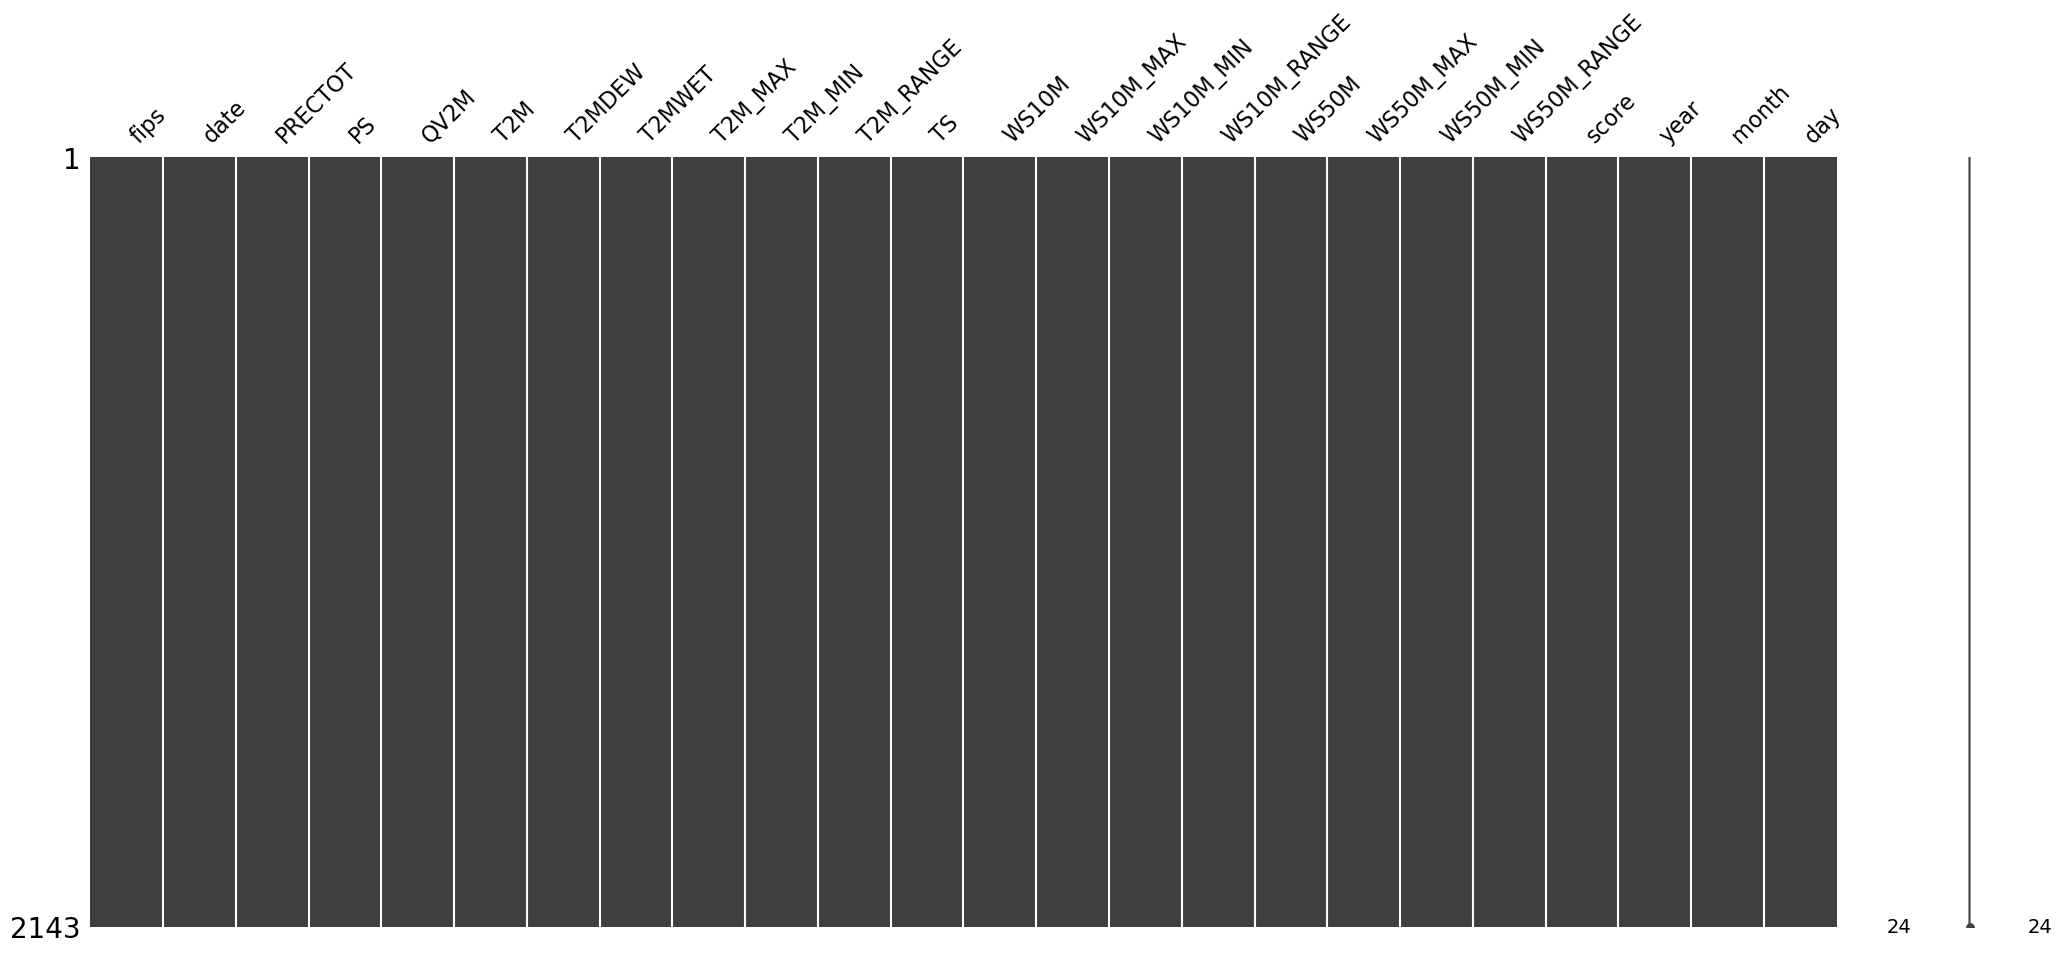

In [12]:
msno.matrix(df)

We can see there are no missing values in this dataset.

#### Characteristics and trends of the dataset in detail

It is important to look at the distributions of our data, as if it isn't a normal we can not use logistic regression. First, we will check the distributions of the data's features visually using a histogram. 

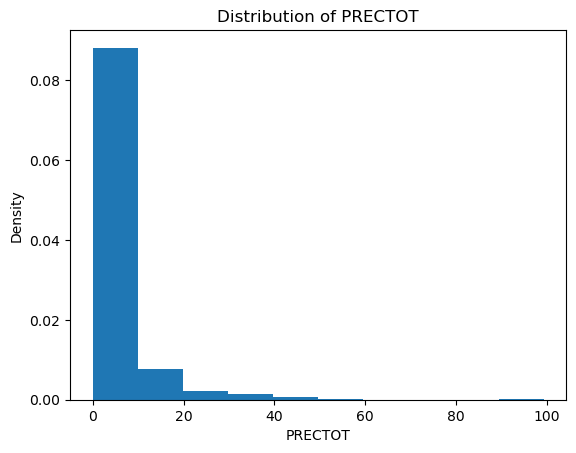

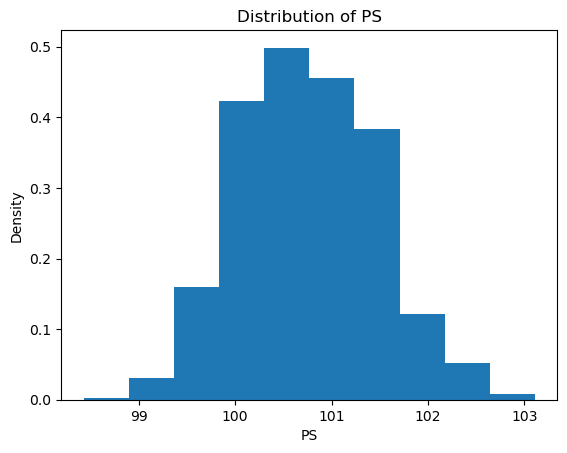

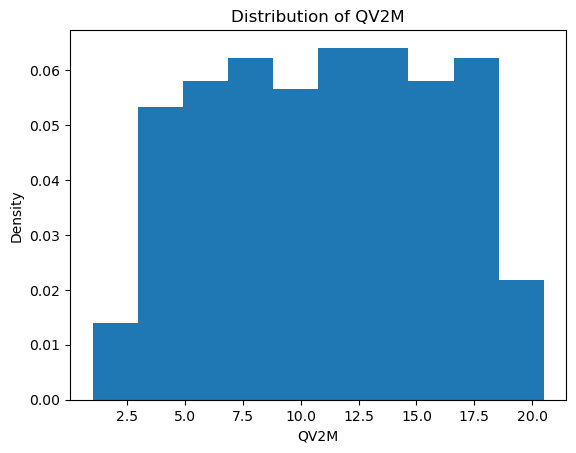

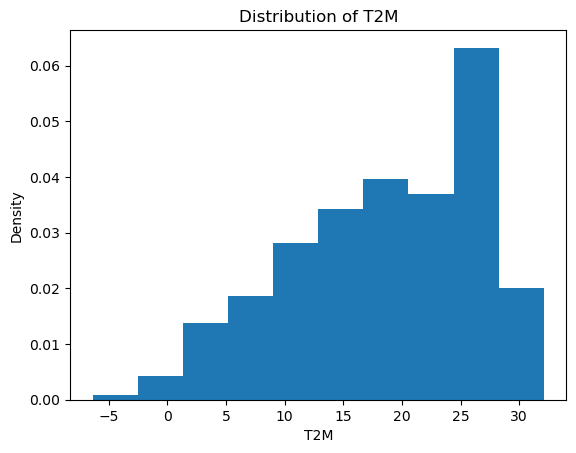

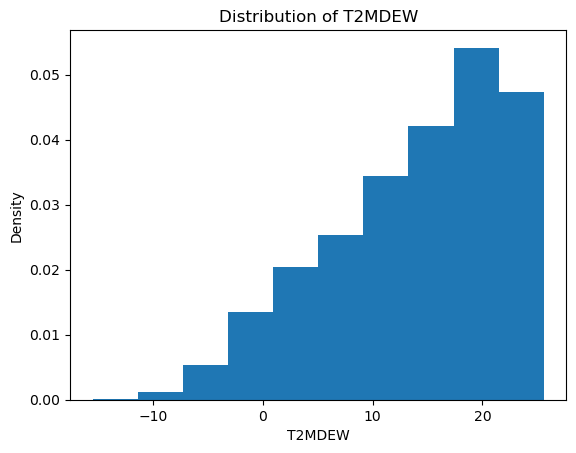

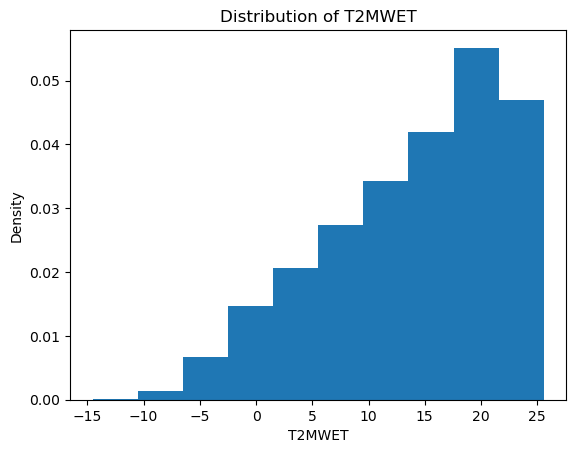

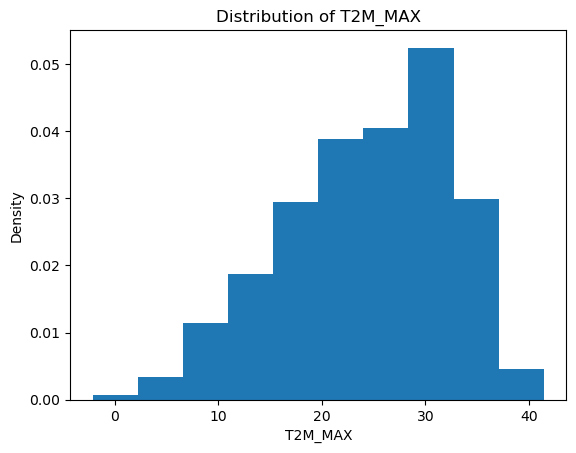

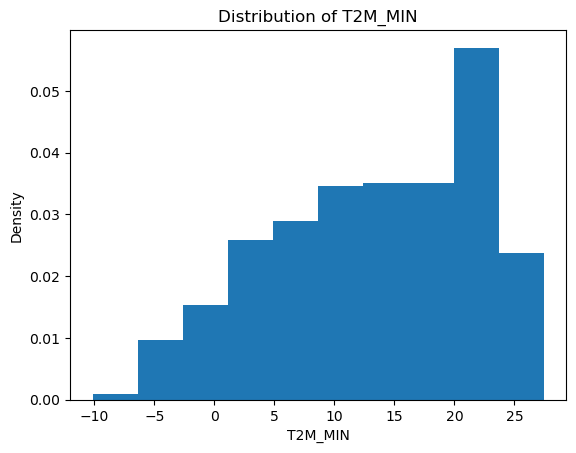

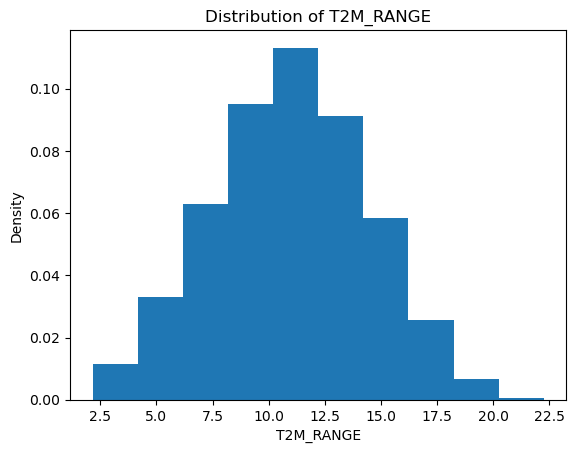

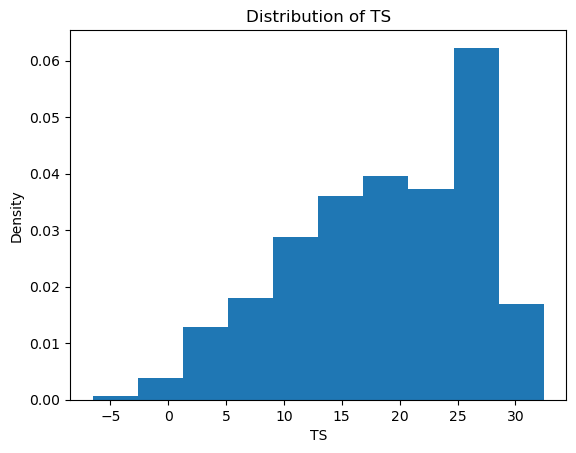

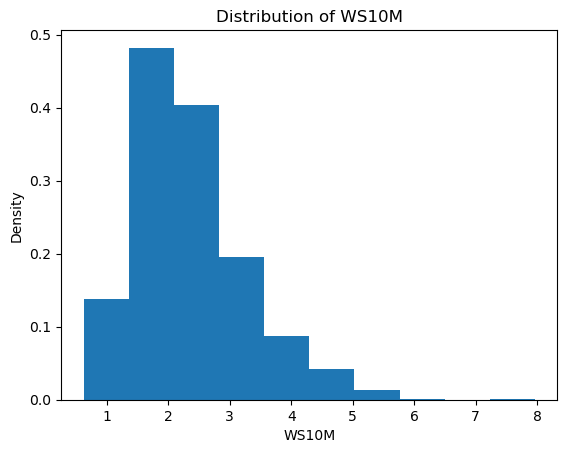

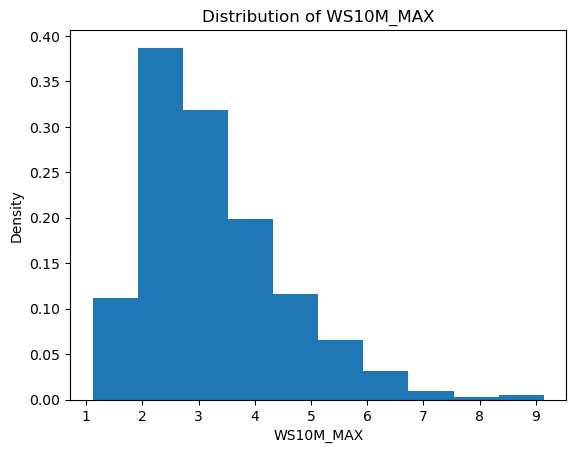

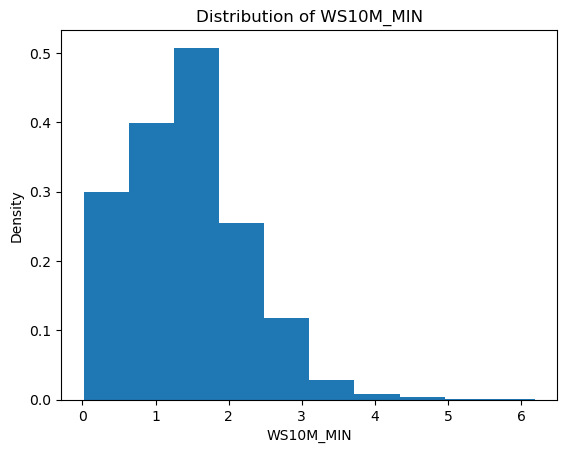

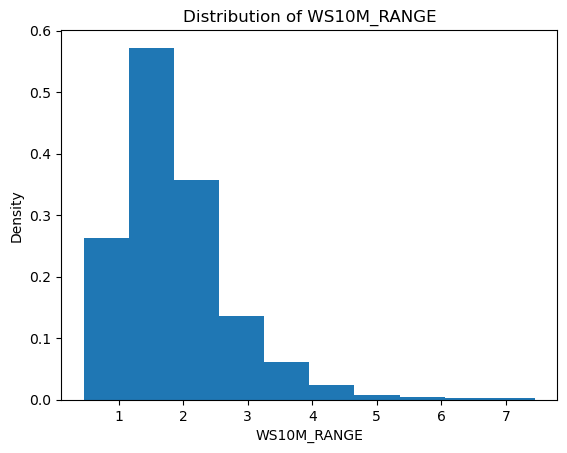

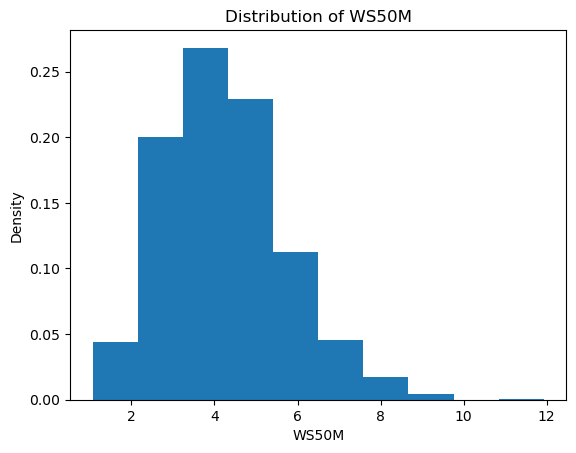

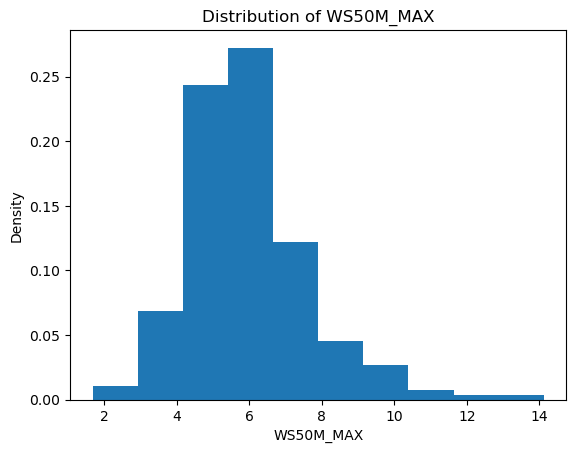

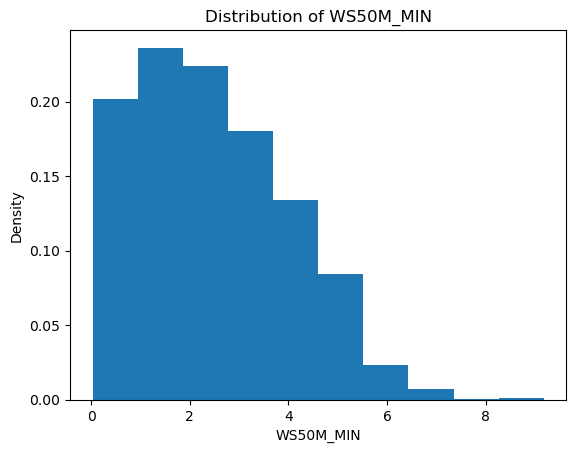

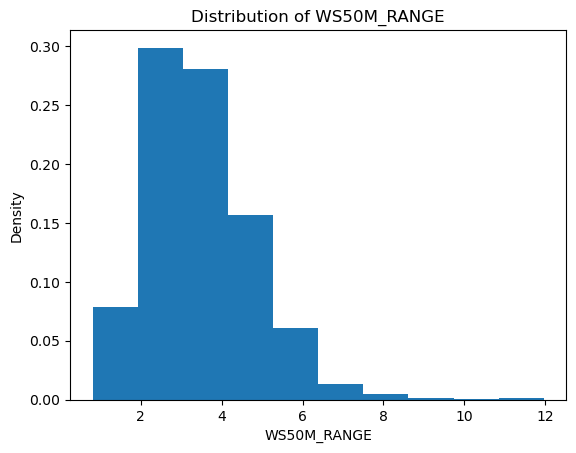

In [13]:
histogram_data_numeric = df[['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE']]

for name in histogram_data_numeric:
    plt.figure()
    plt.hist(histogram_data_numeric[name], density = True)
    x_name = name
    plt.xlabel(x_name)
    y_name = 'Density'
    plt.ylabel(y_name)
    plt.title('Distribution of {x_name}'.format(x_name=x_name))

Some of the variables like T2M_RANGE seem to resemble a gaussian, but many others like PRECTOT do not. We should quantatatively show this using Fisher’s definition of kurtosis, where a value of 0 indicates normally distribuited data. 

In [14]:
df.kurt()

fips           -1.032859
PRECTOT        25.776000
PS             -0.275862
QV2M           -1.147441
T2M            -0.668730
T2MDEW         -0.410329
T2MWET         -0.437023
T2M_MAX        -0.468133
T2M_MIN        -0.893835
T2M_RANGE      -0.371048
TS             -0.685750
WS10M           1.445451
WS10M_MAX       1.503159
WS10M_MIN       1.041195
WS10M_RANGE     4.371685
WS50M           0.467477
WS50M_MAX       2.693249
WS50M_MIN      -0.256806
WS50M_RANGE     2.833647
score           1.088775
year           -1.160617
month          -1.209185
day            -1.194185
dtype: float64

Clearly most of our data is not gaussian and it therefore needs to be transformed. This will be carried out later when the data is split into test and train.

We should also check to see if our data contains outliers. As the data is not normally distributed we can not use the z-score, instead we will use IQR and visualise the data using boxplots.

In [15]:
df_continous_variables = df[['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE']]

df_reshaped = df[['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE','score','date','fips','year','month','day']]

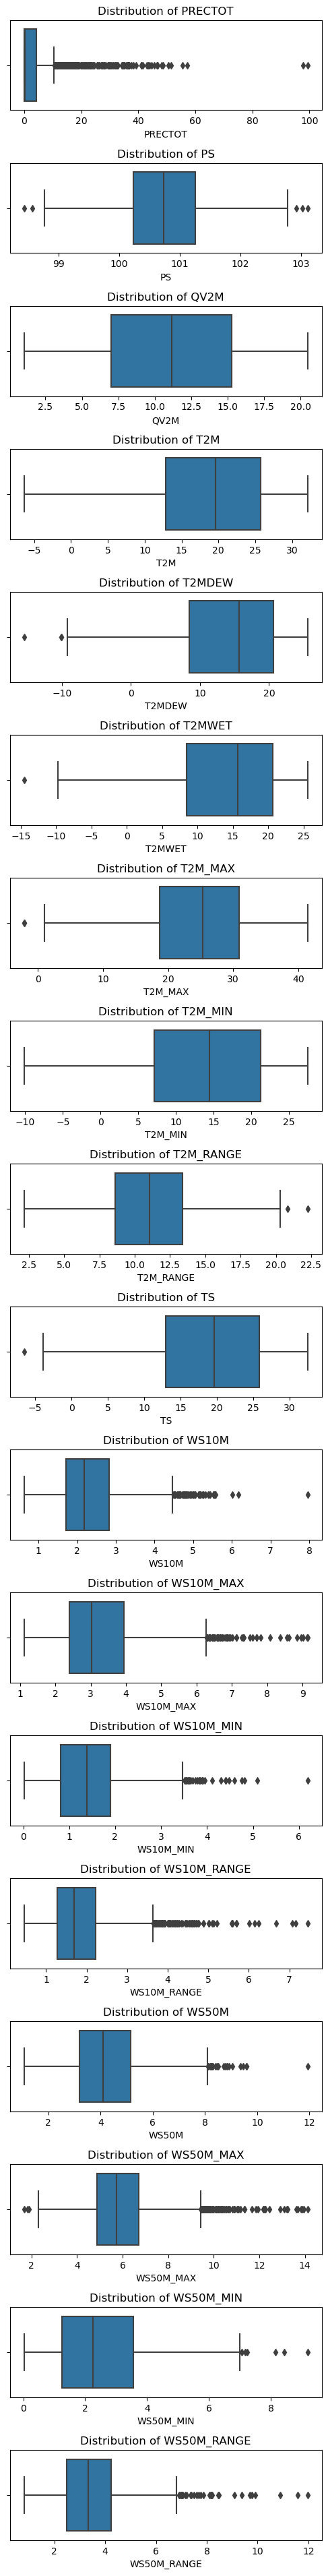

In [16]:
plt.figure(figsize=(5,40))
for x in (range(1,19)):
    plt.subplot(19,1,x)
    sns.boxplot(x =  df_continous_variables.columns[x-1], data=df_continous_variables)
    x_name = df_continous_variables.columns[x-1]
    plt.title(f'Distribution of {x_name}')         
plt.tight_layout()

Clearly, there are many points that can be considered to be outliers. Lets explicitly find how many outliers there are in each column of data.

In [17]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers


column_names = df_reshaped.columns
for i in range(len(column_names)):
   if column_names[i] == "score":
      break
   else:
      print("number of outliers in column: " + str(column_names[i]))
      outliers = find_outliers_IQR(df_reshaped[str(column_names[i])])
      print('number of outliers:'+ str(len(outliers)))

number of outliers in column: PRECTOT
number of outliers:248
number of outliers in column: PS
number of outliers:5
number of outliers in column: QV2M
number of outliers:0
number of outliers in column: T2M
number of outliers:0
number of outliers in column: T2MDEW
number of outliers:3
number of outliers in column: T2MWET
number of outliers:1
number of outliers in column: T2M_MAX
number of outliers:2
number of outliers in column: T2M_MIN
number of outliers:0
number of outliers in column: T2M_RANGE
number of outliers:2
number of outliers in column: TS
number of outliers:1
number of outliers in column: WS10M
number of outliers:66
number of outliers in column: WS10M_MAX
number of outliers:53
number of outliers in column: WS10M_MIN
number of outliers:29
number of outliers in column: WS10M_RANGE
number of outliers:96
number of outliers in column: WS50M
number of outliers:24
number of outliers in column: WS50M_MAX
number of outliers:90
number of outliers in column: WS50M_MIN
number of outliers:

Here we have printed out all the outliers for each column. The PRECTOT feature has the most outliers and they are all very high as seen in the boxplot. PRECTOR refers to the amount of precipitation, so maybe these outliers are due to rare weather conditions. As we have a relatively large dataset it may be sensible to just remove these outliers without replacement. To check this we need to see how much our original dataset reduces in size due to the removal of these outliers.

In [18]:
def drop_outliers_IQR(df, column_name):

   q1=df[column_name].quantile(0.25)

   q3=df[column_name].quantile(0.75)

   IQR=q3-q1

   not_outliers = df[~((df[column_name]<(q1-1.5*IQR)) | (df[column_name]>(q3+1.5*IQR)))]

   outliers_dropped = outliers.dropna().reset_index()

   return outliers_dropped, not_outliers

df_reshaped_old = df_reshaped
df_reshaped_cleaned = df_reshaped

def remove_outliers_loop(df):
   for i in range(len(column_names)):
      #print("removing outliers in column: " + str(column_names[i]))
      if column_names[i] == "score":
         break
      else:
         outliers_dropped, df = drop_outliers_IQR(df, str(column_names[i]))
   return df

df_reshaped_cleaned = remove_outliers_loop(df_reshaped_cleaned)
print('Total rows in original data = ',len(df_reshaped_old.index))
print('Total rows in data with removed outliers = ',len(df_reshaped_cleaned.index))
print('Total number of rows deleted = ',len(df_continous_variables.index) - len(df_reshaped_cleaned.index))

Total rows in original data =  2143
Total rows in data with removed outliers =  1735
Total number of rows deleted =  408


We end up with a reduced data set with 49591 rows. As we still have lots of data it is safe to assume we dont need to replace these values with the column means or mode.

Now we will check for correlations between different features. Before doing this some features need to be removed from the data set. For example, the column labelled date, contains values that are non-numeric and shouldn't be used in a correlation matrix.

In [19]:
#temp = df.drop('score', 1)
temp = df.drop('fips', 1)
numeric_features = temp.drop('date', 1)

df_continous_variables_score = df[['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE','score']]
df_continous_variables_score_cleaned = remove_outliers_loop(df_continous_variables_score)

Index(['score', 'T2M_MAX', 'T2M_RANGE', 'TS', 'T2M', 'T2M_MIN', 'PRECTOT',
       'T2MWET', 'WS10M_RANGE', 'T2MDEW', 'QV2M', 'WS50M_RANGE', 'WS10M_MAX',
       'WS50M_MIN', 'WS50M_MAX', 'WS50M', 'WS10M', 'WS10M_MIN', 'PS'],
      dtype='object')


<AxesSubplot:>

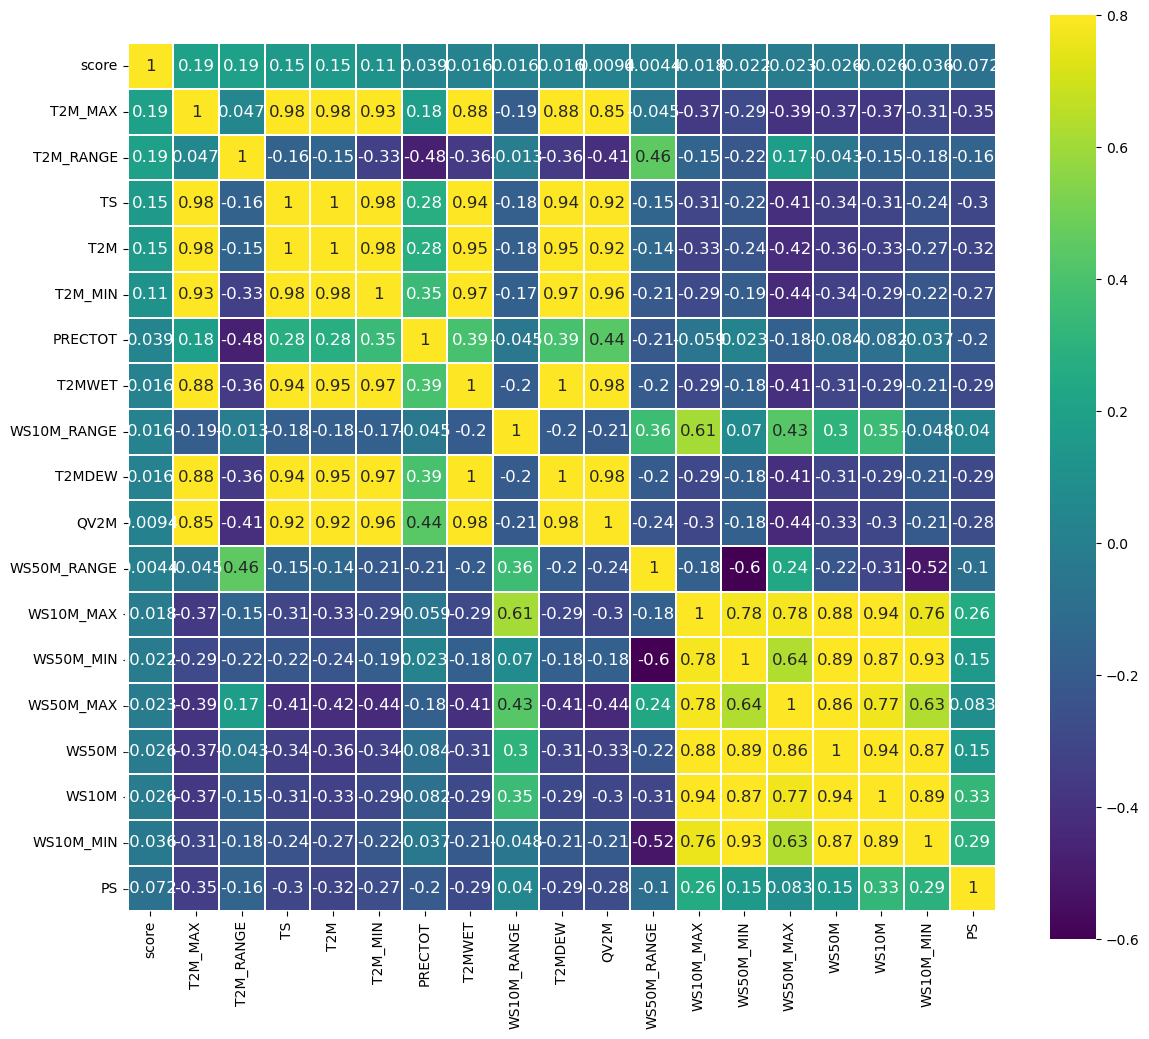

In [20]:
correlation = df_continous_variables_score_cleaned.corr()
k= 22
cols = correlation.nlargest(k,'score')['score'].index
print(cols)
cm = np.corrcoef(df_continous_variables_score_cleaned[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

The values in the correlation matrix are between 0 and 1, where the higher the value, the more correlated both features are. For example, looking at the plot we see WS10M and WS10M_MAX are highly correlated with a value of 0.96. The high correlation value makes sense as both variables are measures of the same physical quantity (wind speed at 10m). In general we see all the highly correlated variables are wind speeds measured at different heights. This is important as two variables that are highly correlated can cause overfitting when training the model. Many models such as random forest and boosting models do not suffer from multicolinearity.

It is also important to look at what features are highly correlated with score as this is what we are predicting. None of the features are heavily correlated with the score, which re-enforces the difficulty of modeling drought prediction.


In [21]:
target = df_reshaped_cleaned['score']

### Task and evaluation (10%)

**Guidelines**: Tell us a bit about the main task that in your view this dataset could help solve and propose and justify the evaluation criteria that would be important here, not only considering the task but your exploratory data analysis. For example, if you found that there is class imbalance in the dataset and that the most important class is the minority one, you may want to add costs in your evaluation metric to account for it, or maybe you want to use a metric specifically suited for imbalanced classification.




The impacts of drought are exstenisve and have many social, economic, environmental and political impacts. Firstly, a lack of water security can cause unhealthy competition between small business owners and farmers, which can lead to overwork and stress among communities effected [5]. Economically, higher water prices will make the poorest in the communities suffer. Any business from farmers to livestock keepers could be severly effected. This has a huge impact on low income countries where many workers are still in the primary sector. The environmental impacts are also clear. If not dealt with sufficiently, drought can cause land to be unusable which decreases biodiveristy. Finally, governments can introduce strict water saving policys causing civil unrest. A lack of management surrounding drought is also likely to cause an increase in civil war in low income countries [6].

All of these impacts of drought show the importance of drought prevention. One method to help achieve this goal is to predict areas that are likely to be high risk and then advise organisations to act swiftly. The benefit of the model we will develop is that it aims to predict varying drought severitys. This means organisations can differentiate between areas of high and low risk and allocate funding appropriately to those areas. 

#### Metrics used to evaluate model performance
The first metric is accuracy defined as,
$$\text{Accuracy} = \frac{\text{number  of corrrect predictions}}{\text{number of wrong predictions}}.$$
The accuracy is a simple measure of model performance, however it does not take into account class imbalance as it assumes your data is symetric. The primary use of accurcay in this report is to compare our models to other baselines. 

The second metric is precision given as,
$$\text{Precision} = \frac{TP}{TP+FP},$$
where $TP$ is the number of true possitive results and $FP$ is the number of false positive results. This is basically a ratio of the correctly predicted positive observations to the total predicted positive observations.

Next we will use recall,
$$\text{Recall} = \frac{TP}{TP+FN},$$
where $FN$ is the number of false negative results. This is a ratio between the correct predictions in a given class to all observations in that class.

The final metric is F1 score,
$$\text{F1 Score} = \frac{2*(\text{Recall} * \text{Precision})}{(\text{Recall} + \text{Precision})}.$$
We can see from the equation that F1 score is a weighted average of precision and recall, therefore it takes into account false possitves and false negatives. This is a particularly useuful metric for imbalanced data.

As explained previously, before training our models we will upsample our minority classes using SMOTE. Therefore, the above metrics do not need to be modified. 

We will also look at the confusion matrix for the final model as this gives a deeper insight into what classes the model can predict well and which ones it performs poorly on. This is essential information for our model to be interpratable.



### Design and build an ML system (20%)

**Guidelines**: Taking into account the task and evaluation criteria set in the previous section design and build now an ML system. If you go for supervised learning, you could start by partiting your dataset in train and test here and try a model on the dataset. But please justify your choices in each case. Why did you choose a specific ML model? Why is it relevant for the task and dataset at hand? Do you envision any challenges with the use of such model? 

Again, we do not ask for a specific model to be used. Instead, we will evaluate the depth and appropriatedness of your analysis. As this section (and some of the following ones) are more open ended we do not specify marks for each question.


***
Please note that if the dataset of your choice is too large to work with, you can simply choose a subset of it. We will not substract any marks for doing so. 
***


#### Model descriptions
As we have outlined before the task is a multiclass classifictaion. We will use multiple different supervised learning models which include KNN, random forest, logistic regression, decision tree and catBoost. The reasoning behind using catBoost is that boosting algorithms generally perform well on tabular data, however they can be computationaly exspensive. Another type of machine learning model are bagging models, hence random forest was used. The final type of model are stacked models which combine multiple weak layers in a ground level, and then combines all their predictions with a meta learner, in this case logistic regression. The justification of using KNN and decision trees is that these are computationally inexspensive models that can be added to the ground level of the stack. In summary we are comparing bagging, boosting and stacking. The final model selected was the stacked model.

#### Model challenges
The main issue with a stacked model is that it is more complex than any of its individual learners, which can make it computationaly exspensive. This creates problems with cost and time when upscalling the model. Another issue is to do with the interpratability of the model. As a stacked model combines many different predictions it is not easy to analyse feature importance. This is important when describing the model to organisations that use its predictions. 


Now we can split our data into train and test using a standard 80% training and 20% test split.

In [22]:
training_df = df_reshaped_cleaned.drop('score', 1)
training_df = training_df.drop('date', 1)
training_df = training_df.drop('fips', 1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(training_df, target, test_size=0.2, random_state=0)

Earlier we stated there was a problem with the data not being gaussianly distributed as this is required for parametric models like logistic regression. We overcome this issue by transforming our X_train data such that it has a mean of 0 and a standard deviation of 1. We then transform X_test in the same way and leave the y_train and y_test the same. Transforming our data also allows a more effecient updating of weights in each model, as the weight optimisation algorithm can search in a space of smaller values.

In [24]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
sm = SMOTE(random_state = 42)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train_scaled, y_train)

In [26]:
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_train_SMOTE))

Resampled dataset shape Counter({1: 713, 4: 713, 0: 713, 2: 713, 3: 713, 5: 713})


Above we have printed the number of data points in each class. We can see there is no longer a class imbalance as all the classes have an equal number of data points.

In [27]:
def results(model, tuning=0, params=0):
  ypred = model.predict(X_test)
  ypred_old = ypred
  ypred_new = ypred
  print('Accuracy:',accuracy_score(y_test, ypred_new))
  print('Precision:',precision_score(y_test, ypred_new, average='weighted'))
  print('Recall:',recall_score(y_test, ypred_new, average='weighted'))
  print('F1 Score:',f1_score(y_test, ypred_new, average='weighted'))
  bs=0
  bp = 0
  if tuning==1:
    halving_cv = RandomizedSearchCV(estimator=model, param_distributions=params, cv=3, n_iter=5, n_jobs = -1, scoring='accuracy')
    _ = halving_cv.fit(X_train_SMOTE, y_train_SMOTE)
    bp = halving_cv.best_params_
  return ypred_old, bs, bp

Now we train the random forest model and print the models performance metrics.

In [28]:
randomf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42, n_jobs=-1)
randomf.fit(X_train_SMOTE, y_train_SMOTE)

RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=-1,
                       random_state=42)

In [36]:
print('Random forest results')
print('-------------------------------------')
ypred_RF, s, p = results(randomf, params=None, tuning=0)


Random forest results
-------------------------------------
Accuracy: 0.515850144092219
Precision: 0.5015996818609071
Recall: 0.515850144092219
F1 Score: 0.5081863079093146


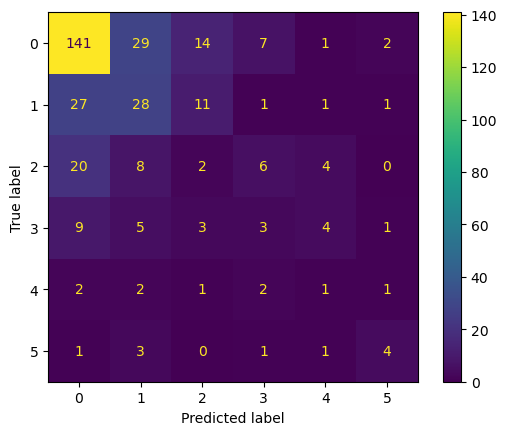

In [37]:
cm = confusion_matrix(y_test,ypred_RF)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

Train a decision tree and print the models performance metrics.

In [31]:
dtree_model = DecisionTreeClassifier(max_depth = 20)
dtree_model.fit(X_train_SMOTE, y_train_SMOTE)

DecisionTreeClassifier(max_depth=20)

In [33]:
print('Decision tree results')
print('-------------------------------------')
ypred_DT = results(dtree_model, params=None, tuning=0)

Decision tree results
-------------------------------------
Accuracy: 0.5417867435158501
Precision: 0.5741029114994746
Recall: 0.5417867435158501
F1 Score: 0.5541260306779393


Now run KNN and print the models performance metrics.

In [34]:
print('KNN results')
print('-------------------------------------')
knn_clf=KNeighborsClassifier(n_jobs=-1)
knn_clf.fit(X_train_SMOTE,y_train_SMOTE)
ypred_KNN = results(knn_clf,  params=None, tuning=0)

KNN results
-------------------------------------
Accuracy: 0.2910662824207493
Precision: 0.42166543204946905
Recall: 0.2910662824207493
F1 Score: 0.32098156502216835


Now run logistic regression and print the models performance metrics.

In [35]:
print('Logistic regression results')
print('-------------------------------------')
LR = LogisticRegression(multi_class='multinomial', solver='lbfgs', n_jobs=-1, max_iter=500)
LR.fit(X_train_SMOTE,y_train_SMOTE)
ypred_LR, s, p = results(LR,  params=0, tuning=0)



Logistic regression results
-------------------------------------
Accuracy: 0.41786743515850144
Precision: 0.5224907126708279
Recall: 0.41786743515850144
F1 Score: 0.4569898854186227


The above confusion matrix has a lighter colour for higher values. For a good model we want the diagonal from top left to bottom right to have high values. These are the TP results. We see that class 0 is predicted well, however it becomes harder to differentiate between classes 1-5. class 5 was predicted correctly more times than not. However, for classes 1-4 this was not true. The model does well classificating the extremes of drought, but not the gradient inbetween.

Now use CatBoost and print the models performance metrics.

In [38]:
from catboost import CatBoostClassifier

In [39]:
CB = CatBoostClassifier(loss_function='MultiClass', task_type="CPU", iterations=1000, logging_level='Silent')
CB.fit(X_train_SMOTE, y_train_SMOTE)

In [40]:
print('CatBoost results')
print('-------------------------------------')
ypred_CB, s, p = results(CB,  params=0, tuning=0)

CatBoost results
-------------------------------------
Accuracy: 0.6080691642651297
Precision: 0.6077661331872225
Recall: 0.6080691642651297
F1 Score: 0.6075867405762749


Now we want to combine models in a stack and see if the overall accuracy of the model increases.

Run the stack and print the models performance metrics.

In [41]:
# Create a stacking classifier
knn_for_stack = KNeighborsClassifier()
DT_for_stack = DecisionTreeClassifier(max_depth = 20)
RF_for_stack = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42, n_jobs=-1)
LR = LogisticRegression(multi_class='multinomial', solver='lbfgs', n_jobs=-1, max_iter=500)
estimators_1 = [
     ('rf', RF_for_stack),
     ('DT', DT_for_stack),
     ('KNN', knn_for_stack)
]
sclf = StackingClassifier(estimators=estimators_1,final_estimator=LR,cv=10)
sclf.fit(X_train_SMOTE,y_train_SMOTE)
print('Stacking classifier results')
print('-------------------------------------')
ypred_LR, s, p = results(sclf,  params=0, tuning=0)

Stacking classifier results
-------------------------------------
Accuracy: 0.5417867435158501
Precision: 0.49832040342262085
Recall: 0.5417867435158501
F1 Score: 0.5155029741116303


### Experimental analysis (performance & scalability) (20%)

**Guidelines**: Test your model here. You can do hyper-parameter tuning and any ablation studies you consider important. How does your model perform? Is there any room for improvement? If so, what do you think it's needed? Comment as well on how does the model compare to previous baselines (yours or from the literature). Do you think model's performance is enough for the application that you are aiming to address? Is the model scalable to a real-world application? Is training data enough for such an application? How does the model's performance compare to a more/less computationally heavy model? Some of these questions may be more or less relevant depending on your application, so we leave it up to you to decide which factors in terms of performance and scalability you consider most important to evaluate.


The stacking procedure improved the model slightly and will therefore be used as the final model. To analyze the model further we will conduct an oblation study by removing a model from the stack and seeing how the new stacked model performs. We will also hyperparameter tune the model by tuning each stacked model first separately, and then stacking the tuned models to form a final model. The hyperparameter search is conducted by a random grid search and the model is evaluated using k-cross validation accuracy to obtain the best parameters. K-cross validation splits the training data into equally sized splits, where one split subset acts as the testing set, and the rest are used for training the model. This can be useful to prevent the model from overfitting.

In [ ]:
def hyperparameter_tune(model, params):
  halving_cv = RandomizedSearchCV(estimator=model, param_distributions=params, cv=3, n_iter=5, n_jobs = -1, scoring='accuracy')
  _ = halving_cv.fit(X_train_SMOTE, y_train_SMOTE)
  bp = halving_cv.best_params_
  print(bp)
  return None

Now we hyperparameter tune the random forest model and output the optimal model parameters.

In [ ]:
param_grid = {"min_samples_split": [5, 10, 20, 50], "max_depth": [5,10,15,20], 
                  "max_features": [3,4,5],
                }
randomf_tune = RandomForestClassifier(n_jobs=-1)

print('Best params after hyperparameter tuning for random forest')
print('-------------------------------------------------------------')
hyperparameter_tune(randomf_tune, params=param_grid)


Best params after hyperparameter tuning
---------------------------------------------------
{'min_samples_split': 10, 'max_features': 5, 'max_depth': 20}


Now we hyperparameter tune the KNN model and output the optimal model parameters.

In [ ]:
param_grid = {"n_neighbors": [2, 3], "leaf_size": [5,10,15], 
                "p": [1],}
knn_tune=KNeighborsClassifier(n_jobs=-1)
print('Best params after hyperparameter tuning for KNN')
print('-------------------------------------------------------------')
hyperparameter_tune(knn_tune, params=param_grid)

{'p': 1, 'n_neighbors': 2, 'leaf_size': 5}


Now we hyperparameter tune the decision tree model and output the optimal model parameters.

In [ ]:
params_grid = {
    'max_depth': [10,20,50,100],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ["gini", "entropy"]
}
dtree_tune = DecisionTreeClassifier()
print('Best params after hyperparameter tuning for the decision tree')
print('-------------------------------------------------------------')
hyperparameter_tune(dtree_tune, params=params_grid)

{'min_samples_leaf': 10, 'max_depth': 20, 'criterion': 'gini'}


Now the individual models have been tuned we will create a new stack with the tuned models and see how the performance is effected.

Run tuned stack and print the models performance metrics.

In [ ]:
knn_for_stack = KNeighborsClassifier(p=1, n_neighbors= 2, leaf_size= 5,n_jobs=-1)
DT_for_stack = DecisionTreeClassifier(min_samples_leaf= 5, max_depth= 100, criterion='entropy')
RF_for_stack = RandomForestClassifier(min_samples_split=20, max_features= 3, max_depth= 20, n_jobs=-1)
LR = LogisticRegression(multi_class='multinomial', solver='lbfgs', n_jobs=-1, max_iter=500)

In [ ]:
estimators_tune = [
     ('rf', RF_for_stack),
     ('DT', DT_for_stack),
     ('knn', knn_for_stack)
]
sclf_tune = StackingClassifier(estimators=estimators_tune,final_estimator=LR,cv=10)
sclf_tune.fit(X_train_SMOTE,y_train_SMOTE)
print('Tuned stacking classifier results')
print('-------------------------------------')
ypred_stack_tune, s, p = results(sclf_tune, params=None, tuning=0)

Tuned stacking classifier results
-------------------------------------
Accuracy: 0.5360230547550432
Precision: 0.49676200587925134
Recall: 0.5360230547550432
F1 Score: 0.5128960568275923


All the measures of performance improve from the previous untuned stack. For example, the accuracy improves to 0.7471 from 0.7431 indicating the stack model has been improved.

Now we show the confusion matrix of our final tuned model.

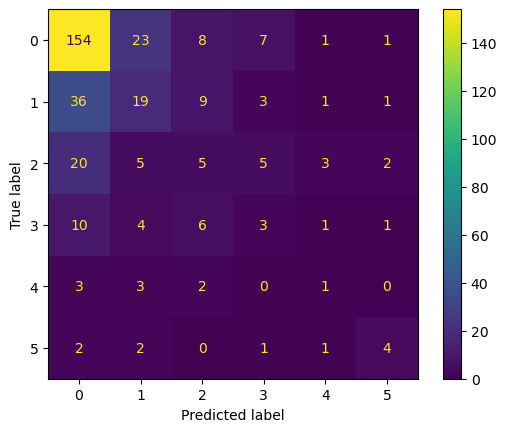

In [ ]:
cm = confusion_matrix(y_test,ypred_stack_tune)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

Perform oblation study. First we remove the KNN classifier.

In [ ]:
estimators_2 = [
     ('rf', RF_for_stack),
     ('DT', DT_for_stack),
]
sclf = StackingClassifier(estimators=estimators_2,final_estimator=LR,cv=10)
sclf.fit(X_train_SMOTE,y_train_SMOTE)
print('Tuned stacking classifier results without KNN')
print('-------------------------------------')
ypred_stack_tune, s, p = results(randomf, params=None, tuning=0)

Accuracy: 0.7392352982904165
Precision: 0.7401346287393075
Recall: 0.7392352982904165
F1 Score: 0.7396113454732057


Now remove random forest.

In [ ]:
estimators_3 = [
     ('knn', knn_for_stack),
     ('DT', DT_for_stack),
]
sclf = StackingClassifier(estimators=estimators_3,final_estimator=LR,cv=10)
sclf.fit(X_train_SMOTE,y_train_SMOTE)
print('Tuned stacking classifier results without random forest')
print('-------------------------------------')
ypred_LR, s, p = results(sclf,  params=0, tuning=0)

Accuracy: 0.7359367241257005
Precision: 0.7391256558796949
Recall: 0.7359367241257005
F1 Score: 0.7374332965492625


Now remove the decision tree.

In [ ]:
estimators_4 = [
     ('knn', knn_for_stack),
     ('rf', RF_for_stack),
]
sclf = StackingClassifier(estimators=estimators_3,final_estimator=LR,cv=10)
sclf.fit(X_train_SMOTE,y_train_SMOTE)
print('Tuned stacking classifier results without the decision tree')
print('-------------------------------------')
ypred_LR, s, p = results(sclf,  params=0, tuning=0)

Accuracy: 0.7352982904164006
Precision: 0.7384178077999994
Recall: 0.7352982904164006
F1 Score: 0.7367655099655422


From these results we see the models performance decreases when any of the three stacking models are removed. This implies all the three models provide useful information and should all be kept in the stack. The accuracy dropped the most when removing the decision tree from the stack.

#### Comparison to previous benchline
The previous benchline used a random forest model the same as the one used in this notebook, however it was not hyperparameter tuned and it was trained on the complete dataset. To see how my final model compares against this benchmark, I reproduced the random forest model and trained it on our subset of data. I showed from the individual models used random forest perfoms the best with an accuracy of 0.7392 just as the benchmark had shown. However, this report goes a step further by showing that stacking a KNN, decision tree and random forest classifiers will improve performance. The accuracy of the stacked model improved to 0.7431, and after hyperparameter tuning it improved once more to 0.7471. This indicates that the final stacked model presented here improves on the benchline results. To confirm this the model should be trained on the complete dataset.
#### Improvements
A clear improvement can be made by training the models on the complete dataset. It would be expected that all the performance metrics should improve by doing this as more data provides more information. 

Another improvement could be made by conducting a more thorough grid search of hyperparameters. When tuning the models I used a random grid search of realtively few parameters, as this is relatively quick, however a complete grid search could be conducted if the system used has enough computing power. Generally, a complete grid search is very intensive so a comprimise between performance and computing time could be made by using a bayesian optimisation hyperparameter tuning method. Unfortunely, this was also too computationaly intensive for my machine.

#### Is the model scalable to a real-world application?
The final stacked model is a more computatinally intensive model than the baseline random forest model, as we are using 4 models to make the stack. To answer the question properly we need to make a distinction between the hyperparameter tuned stacked model and the stacked model before tuning. Although there was an accuracy improvement by tuning, this improvement was only 0.004 and the runtime to achieve this was very long comapared to the baseline. The non-tuned stacked model howevver had a runtime similiar to the baseline. The most scalable model is therefore the untuned model. It is also important to note that although the final tuned model took a long time to train, the predictions made on the test data were quick. So, either of the stacked models could be used depending on the circumstance. 

#### Do you think model's performance is enough for the application that you are aiming to address?
The performance of the model is good enough to be used in combination with real world surveys and governmental programs. It should not be used to make definite predictions on which regions are likely to undergo drought. A good use of this model would be to advise governments on which regions the model predicts could be high risk. Then a census could be conducted in those regions to further inform the decision. This is useful as governments will be able to target high risk areas much quicker and provide drought prevention infrastructure.

### Ethical considerations (15%)

**Guidelines**: Analyse and discuss the ethical dimensions of the application: bias, fairness, interpretability, etc. Some of these may not be relevant, but we leave this for you to decide which ones would be the relevant ones to consider for the problem at hand. Here you could do a sensitivity/interpretability analysis of the model, to study the effect of different variables or examine whether there are any biases (e.g. the model performs best for certain group of examples in your dataset). You could also link this part with your exploratory data analysis, focusing on the ethical dimensions of the dataset rather than the model you built. Justify what your analysis tell us about these ethical dimensions. 


#### Data set bias 

One crucial bias to address is that the dataset only contains data from the USA. This may mean that our model will predict best for countries with similiar geographical features as the USA. 

#### Data imbalance

Another bias is that our data had a class imbalance. I tried to mitigate against this problem by upsampling the monority classes using SMOTE. We can look at how our model predicts each class seperately to understand this problem further.

In [ ]:
print(classification_report(y_test,ypred_stack_tune))


              precision    recall  f1-score   support

           0       0.74      0.77      0.76       194
           1       0.28      0.25      0.26        69
           2       0.19      0.15      0.17        40
           3       0.32      0.24      0.27        25
           4       0.08      0.11      0.09         9
           5       0.33      0.70      0.45        10

    accuracy                           0.54       347
   macro avg       0.32      0.37      0.33       347
weighted avg       0.53      0.54      0.53       347



TALK ABOUT THE ACTUAL ACCURACY WHEN RUN PROPERLY.

#### Interpratability analysis

Interpratability analysis is extremeley important in machine learning, as it allows a non expert to understand what features of the model are most important to predicting the desired outcome. This is particularly important for my final model, as it combines many different models, which is inherintly difficult to understand intuitively. It is not obvious how to conduct an interpratability analysis for the stacked model, so we will conduct a feature importance investigation for each of the models used whithin the stack. The exception is for the KNN model, as feature importance is not taken into account in the algorithm.  

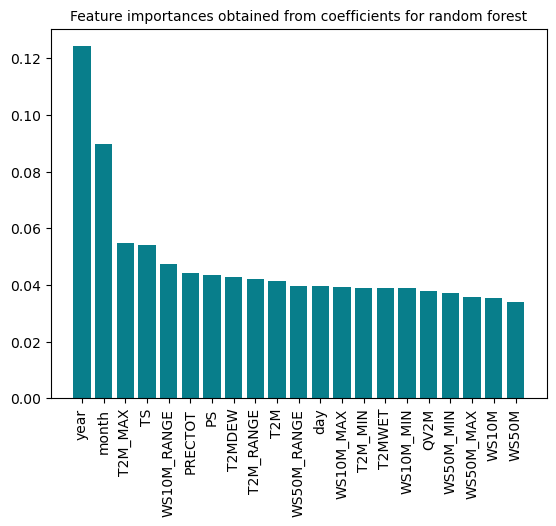

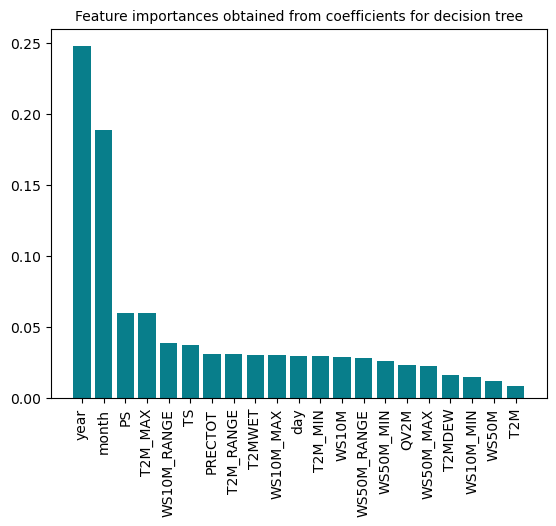

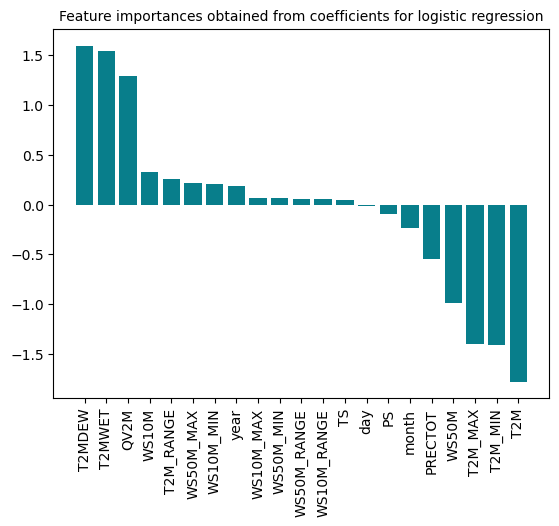

In [ ]:
def feature_importance(importance_metric, name):
    importances = pd.DataFrame(data={
        'Attribute': X_train.columns,
        'Importance': importance_metric
    })
    importances = importances.sort_values(by='Importance', ascending=False)

    plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
    plt.title('Feature importances obtained from coefficients for '+ name, size=10)
    plt.xticks(rotation='vertical')
    plt.show()
    return None
RF_for_stack.fit(X_train_SMOTE, y_train_SMOTE)
feature_importance(RF_for_stack.feature_importances_, 'random forest')
DT_for_stack.fit(X_train_SMOTE, y_train_SMOTE)
feature_importance(DT_for_stack.feature_importances_, 'decision tree')
LR.fit(X_train_SMOTE, y_train_SMOTE)
feature_importance(LR.coef_[0], 'logistic regression')


The larger the magnitude of the y-axis value, the more importance a given fature has on the prediction of the model. From the random forest plot we see year and month clearly have the biggest effect. This makes sense as drought is highly dependant on seasonal and annual weather. The rest of the features have a roughly equal importance. A similar trend is seen for the decision tree, but a higher importance is placed on the year and month variables. For the logistic regression classifier this pattern is not seen, which could explain the poorer perfomance of this model when used by itself.

### Sustainable development relevance & impact (15%)

**Guidelines**: Discuss what are the current challenges surrounding this dataset in terms of sustainable development and how can ML help overcome them? Additionally, bring out all of the things you have managed to do and understand from the experiments and connect them to sustainable development. Discuss what are the challenges of deploying such a model and how it could impact our progress towards achieving the sustainable development goals. 






Drought prediction is an extremely useful tool for governments, NGOs and businesses. The implications of drought wherever that be economic, social, environmental or political are extrememly complex and the best solution is prevention [7]. Having a model that can accurately predict drough is therefore useful in advising governments and NGOs the best places to intervene. The model developed is good enough to be used for this application especially if trained on the whole dataset. 

#### Direct impacts

Drought prediction has a direct impact on goal 6 (clean water and sanitation) [8] and goal 11 (sustainaible cities and communities) [9]. Our model aims to predict drought which allows communities that are in need to recieve adequate funding and resources to combat drought. The direct impacts of this model are listen below.

##### Goal 6:
6.3: By 2030 this goal aims to reduce water wastage in many forms. This is carried out by recycling water and reusing it globally.

6.4: By 2030 this goal aims to reduce water scarcity and the number of people effected by it.

6.5:
By 2030, implement water resource management systems at all levels of society.

6.a:
By 2030, increase global cooperation for water protection programs.

6.b:
Support local communities in water management.

##### Goal 11:
11.5:
By 2030 this goal aims to reduce economic losses resulting directly from a large range of sources which include "water-related disasters".



#### Indirect impacts

Predicting drought also has many indirect impacts. These indirect impacts cover all the sustainabilty goals, so for clarity only the key ones will be shown below. These include goal 1 (no poverty) [10], goal 15 (life on land) [11] and goal 8 (decent work and economic growth) [12].

##### Goal 1:
1.1 By 2030 this goal aims to eradicate extreme poverty for everyone.

##### Goal 15:
15.1
By 2020 this goal aims to conserve different types of land.

##### Goal 8:
8.2
This goal aims to achieve higher economic growth through many means which include technological advancements.

#### How can the model effect sustainability negatively
A key problem with the model discussed earlier is its inherit bias as the data only comes from the USA. Many countries that are most severly effected by drought are low income countries as they can not afford basic tools to deal with drought. As this model doesn't have data from these regions it could easily predict poorly there. This would further increase inequality as high income countries have a model to predict drought but low income countries do not. This prohibits the achievement of goal 10 (reduce inequlaity).

#### Challenges with deploying the model

Previously, we mentioned the model can be computationally intensive to train and this makes it difficult to deploy. However, we can sacrifice a small amount of accuracy and use the pre-tuned model which would be computationally cheaper. It is important to know that the benefits of this model will only be applied with organizational help, such as through governments or NGOs, therefore iterpretability is important. Although we were able to extract the important features (year and month), this was only for the individual models not for the whole stack. It may be difficult to explain and convince organizations to use a model that is not easily interpretable.

## References

[1] University of Nebraska-Lincoln. (2022, November). U.S. Drought Monitor Data. https://droughtmonitor.unl.edu/Data.aspx

[2] Akshaya Srinivasan. (2022, May). Drought Prediction Using ML Algorithms. https://www.kaggle.com/code/akshayasrinivasan2/drought-prediction-using-ml-algorithms

[3] Thøgersen, M., Escalera, S., Gonzàlez, J., & Moeslund, T. B. (2016). Segmentation of RGB-D indoor scenes by stacking random forests and conditional random fields. Pattern Recognition Letters, 80. https://doi.org/10.1016/j.patrec.2016.06.024

[4] Changnon, S. A., & Easterling, W. E. (1989). MEASURING DROUGHT IMPACTS: THE ILLINOIS CASE. JAWRA Journal of the American Water Resources Association, 25(1). https://doi.org/10.1111/j.1752-1688.1989.tb05663.x

[5] Edwards, B., Gray, M., & Hunter, B. (2019). The social and economic impacts of drought. Australian Journal of Social Issues, 54(1). https://doi.org/10.1002/ajs4.52

[6] Theisen, O. M., Holtermann, H., & Buhaug, H. (2009). Drought, Political Exclusion, and Civil War. Climate Change, Social Stress and Violent Conflict: State of the Art and Research Notes.

[7] Wilhite, D. A., Svoboda, M. D., & Hayes, M. J. (2007). Understanding the complex impacts of drought: A key to enhancing drought  mitigation and preparedness. Water Resources Management, 21(5). https://doi.org/10.1007/s11269-006-9076-5

[8] “Goal 6 | Department of Economic and Social Affairs.” Sdgs.un.org, 2021, sdgs.un.org/goals/goal6

[9] “Goal 11 | Department of Economic and Social Affairs.” Sdgs.un.org, 2021, sdgs.un.org/goals/goal11

[10] “Goal 1 | Department of Economic and Social Affairs.” Sdgs.un.org, 2021, sdgs.un.org/goals/goal1

[11] “Goal 15 | Department of Economic and Social Affairs.” Sdgs.un.org, 2021, sdgs.un.org/goals/goal15

[12] “Goal 8 | Department of Economic and Social Affairs.” Sdgs.un.org, 2021, sdgs.un.org/goals/goal8